# Lab MOA
## Author : François Amat
## Contact: francois.amat@telecom-paristech.fr

## Run several experiments with at least 5 classifiers, to find the classifier with better performance for this dataset


## What do we know about the data:

  ### Brief description provided by the  [moa website](https://moa.cms.waikato.ac.nz/datasets/):

  Forest Covertype Contains the forest cover type for 30 x 30 meter cells obtained from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. It contains 581, 012 instances and 54 attributes, and it has been used in several papers on data stream classification

  We can get more Informations given by the [Uci machine learning repository](https://archive.ics.uci.edu/ml/datasets/Covertype), the most important Information is that there are 7 Covertypes.

  ### In the following I will use the normalized dataset provided by the [moa website](https://moa.cms.waikato.ac.nz/datasets/):
  [dataset source](https://sourceforge.net/projects/moa-datastream/files/Datasets/Classification/covtypeNorm.arff.zip/download/)


􏰋Classifiers selected for the experiments
  In order to select the best classifiers I use this [image from scikit-learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/) to help me choose. 

The classifier that I choosed are : knn, bayes, SGD, RuleClassifier, HoeffdingTree.

The command I use for in moa are : 
```
EvaluateInterleavedTestThenTrain -l lazy.kNN -s
    (ArffFileStream -f /Users/famat/Downloads/covtypeNorm.arff)

EvaluateInterleavedTestThenTrain -l bayes.NaiveBayes -s 
    (ArffFileStream -f /Users/famat/Downloads/covtypeNorm.arff)

EvaluateInterleavedTestThenTrain -l functions.SGD -s
    (ArffFileStream -f /Users/famat/Downloads/covtypeNorm.arff)


EvaluateInterleavedTestThenTrain -l rules.RuleClassifier -s
    (ArffFileStream -f /Users/famat/Downloads/covtypeNorm.arff)

EvaluateInterleavedTestThenTrain -l trees.HoeffdingAdaptiveTree -s
    (ArffFileStream -f /Users/famat/Downloads/covtypeNorm.arff)

```

In the following I use python in order to analyse the data given from Moa

In [33]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("results")
current_path = os.getcwd()

In [48]:
collection_of_dataset = []
for el in os.listdir():
    full_path = current_path + "/" + el 
    test = pandas.read_csv(full_path)
    test['name'] = el
    collection_of_name.append(el)
    collection_of_dataset.append(test)
merged_dataset = pd.concat(collection_of_dataset,sort=True)

In [ ]:
"""
Index(['learning evaluation instances', 'evaluation time (cpu seconds)',
       'model cost (RAM-Hours)', 'classified instances',
       'classifications correct (percent)', 'Kappa Statistic (percent)',
       'Kappa Temporal Statistic (percent)', 'Kappa M Statistic (percent)',
       'model training instances', 'model serialized size (bytes)'],
      dtype='object')
"""

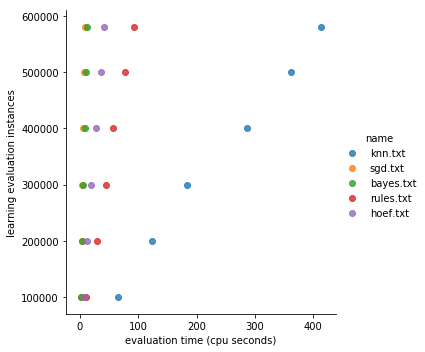

In [49]:
sns.lmplot( 'evaluation time (cpu seconds)',
            'learning evaluation instances',
           data = merged_dataset, hue="name" ,
           fit_reg=False)
plt.show()

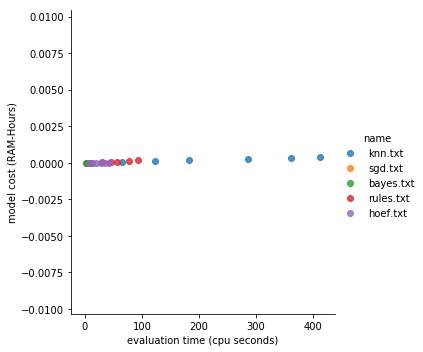

In [50]:
sns.lmplot('evaluation time (cpu seconds)',
            'model cost (RAM-Hours)',
           data = merged_dataset, hue="name" ,
           fit_reg=False)
plt.show()

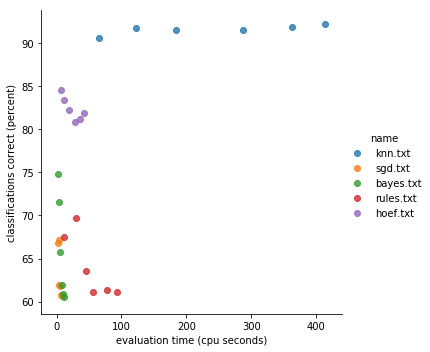

In [51]:
sns.lmplot('evaluation time (cpu seconds)',
            'classifications correct (percent)',
           data = merged_dataset, hue="name" ,
           fit_reg=False)
plt.show()

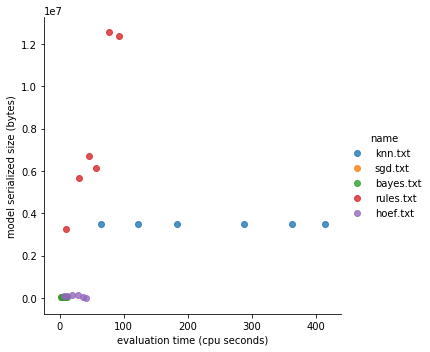

In [52]:
sns.lmplot('evaluation time (cpu seconds)',
            'model serialized size (bytes)',
           data = merged_dataset, hue="name" ,
           fit_reg=False)
plt.show()

## Observations :

    The lazy knn have the best results (classifications correct), followed by the hoeffing tree and bayes.
    
    The time taken to compute these models are in this decreasing order: knn, Bayes, hoeffing tree, sgd and bayes. 
    
    The size taken of these models are in this decreasing order : rules, knn, hoeffing tree, bayes and sgd.
    
    

## Conclusion 
    If we only performances, the knn classifier is to choose, however if we want the best performance, with regards to performance, time consuming and size consuming; the Hoeffding Adaptive Tree is the best solution among the others selected.